<a href="https://colab.research.google.com/github/Kristovpsy/ML-PRACTICE/blob/main/SENTIMENT_ANALYZER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully!
Total messages: 37
Sentiment distribution:
sentiment
positive    22
neutral     15
Name: count, dtype: int64

TRAINING SENTIMENT MODEL
Training samples: 25
Testing samples: 12

Training TF-IDF + Logistic Regression model...

Model Performance:
Accuracy: 0.5833

Classification Report:
              precision    recall  f1-score   support

     Neutral       0.50      0.60      0.55         5
    Positive       0.67      0.57      0.62         7

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12


Confusion Matrix:


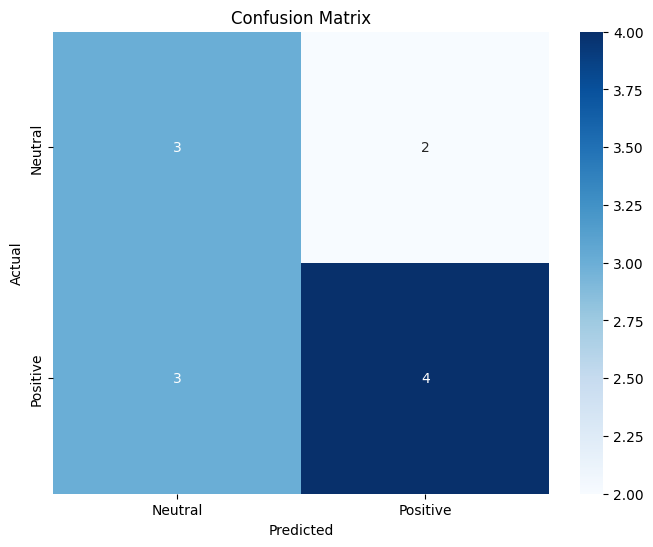

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

def load_winnies_dataset():
    """Load and process Winnie's birthday wishes dataset"""

    # Create the dataset from the provided data
    data = [
        {"text": "a lovely retirement in your new age", "sentiment": "positive"},
        {"text": "wishing you ma a happy 60th birthday", "sentiment": "positive"},
        {"text": "to an Amazing boss we love you dearly wishing you a happy retirement", "sentiment": "positive"},
        {"text": "Happy retirement and 60th birthday!!", "sentiment": "neutral"},
        {"text": "Happy Birthday MA", "sentiment": "neutral"},
        {"text": "HAPPY Birthday Ma", "sentiment": "neutral"},
        {"text": "Congratulations ma, may God continue to shower you with his blessings, showcase and lift you up continuously in the mighty name of Jesus amen 🙏. God bless you ma", "sentiment": "positive"},
        {"text": "Congratulations Ma, wishing you all the best in your retirement life and God be your strength.", "sentiment": "positive"},
        {"text": "Am wishing you all the Best in ur Retirement age May almighty Allah bless you and keep your good deed u have made us pround in the Livestock Sector in the Nigerian Agriculture and Livestock Development Ministry. We will never forget your input in the development of the Livestock Sector. U deserved my words always Dr Mrs Winnie Lai Solarin Mother of Animal Scientists. WISHING YOU ALL THE BEST IN UR RETIREMENT MAMA.Thanks", "sentiment": "positive"},
        {"text": "This woman deserves to be celebrated. We at Farmteco Consulting Limited do hereby join the host of women farmers in Nigeria to celebrate the impacts of this great woman in agriculture and agribusiness development in Nigeria and wish her many more prosperous years filled with impacts in good health.", "sentiment": "neutral"},
        {"text": "Congratulations dear. You put smiles on peoples faces & hearts. You will surely be missed. Retired but not tired. God keep you for us all from DAHS, Enugu State", "sentiment": "positive"},
        {"text": "Congratulations to you on your retirement ma. May you live long to enjoy your hard work and contributions to national development.", "sentiment": "positive"},
        {"text": "Congratulations to you ma. and family. Your dedication, wisdom, thoughtfulness and kindness to the state office staffs under your watch is commendable . You took care of us like your very own. You have touched so many lives in ways you didn't know. May this next chapter be filled with joy, relaxation, and new adventures. I wish you well ma.", "sentiment": "neutral"},
        {"text": "Congratulations ma, A woman with golden heart, always looking younger than her age. The lord Almighty will see you through. Congratulations once more see you in the field. Your miracle's Satumari", "sentiment": "neutral"},
        {"text": "I wish you many fruitful years ahead. The Lord continue to bless and keep you. Happy birthday ma. Thanks for the fewhours spent in your company last year. Enjoy the celebration", "sentiment": "positive"},
        {"text": "She is a rare icon, a woman of great courage, reputation and zero tolerance for laziness. Though she retires but her positive impacts in the ministry lingers on. She's headed for greater heights and my prayer is that she continues in this fervency to be more impactful especially to Nigeria women in agriculture.", "sentiment": "positive"},
        {"text": "I congratulate you on your retirement from active service. Your contribution to livestock development in Nigeria will be written in gold. You've been a role model to many, a woman with the heart of lion who gives her all and never miss the target. We will surely miss you. I wish you a happy retirement. Congratulations.", "sentiment": "positive"},
        {"text": "Congratulations to a visionary leader. Thank you for all you do for the department of Animal Husbandry Services & the Ministry @large.I pray that the Almighty God will lead & order your steps in this new phase of your life. Happy 60th Birthday & Congratulations on your Retirement.", "sentiment": "positive"},
        {"text": "Thank God for making you work in good health and retire well I rejoice with you and family congratulations", "sentiment": "neutral"},
        {"text": "Unbehalf of ministry of livestock aquaculture and fisheries development cross river state,I say congratulations on your successful retirement and birthday celebration.we wish you God's continuous protection, good health of mind and body, God's divine grace upon you.congratulation once again ma'am.happy celebration.", "sentiment": "positive"},
        {"text": "A huge congratulations to our highly esteemed Director on the occasion of her 60th birthday celebration and a successful retirement from the civil service. May God grant you more grace to remain relevant in steering the Animal Agriculture sector and indeed the entire nation of Nigeria towards persistent growth and increase. I love you Esteemed director ma'am and I wish you all the good things of life. Congratulations once again ma'am", "sentiment": "positive"},
        {"text": "We wish you more success and your future will continue to excel. Happy return of the day! Ma", "sentiment": "positive"},
        {"text": "Dr. Winnie Lai- Solarin, I am thrilled for you as you step into a well deserved retirement filled with relaxation, joy and new adventures. Thank you for everything- your legacy will always be remembered. May this next phase bring you happiness, good health and the fulfilment of all your dreams. Ogunmakinde Olabisi", "sentiment": "positive"},
        {"text": "Dr Winnie! We are all elated at your great academic milestone and successful tenure of your Services to the growth and development of our beloved country, Nigeria. Accept our special and profound congratulatory messages and convey same to the members of your esteemed family, please. Congratulations our dear, valued and Newest Dr, Ma! Am Mamman Saba Abdulkadir, PhD", "sentiment": "positive"},
        {"text": "Happy Birthday, Ma! Wishing you a wonderful celebration and many more happy returns. May your life be filled with: - Long life and sound health - Happiness and joy - Success, progress, and prosperity Congratulations on your retirement! May this new chapter bring you relaxation, fulfillment, and cherished moments.", "sentiment": "positive"},
        {"text": "Congratulations on your birthday, Happy retirement and wish you joyous and prosperous years ahead", "sentiment": "positive"},
        {"text": "Wishing you love, congratulations ma", "sentiment": "positive"},
        {"text": "Just like that! How i wish the hand time could be turned to allow a beautiful woman with impactful steps to stay longer on stage. Anyway, congratulations on your retirement and happy birthday Ma 🎉🎉🎊🎉🎊🎉.", "sentiment": "neutral"},
        {"text": "Congratulations, congratulations, Congratulations, Ma", "sentiment": "neutral"},
        {"text": "Dear Dr./Mrs, As you embark on this new chapter, I want to express our deepest gratitude for your leadership, guidance, and mentorship throughout the years. Your dedication, expertise, and vision have been invaluable to our organization. We're going to miss your presence, but we're excited to see where your retirement takes you. Enjoy this well-deserved break, and know that your legacy will continue to inspire us. Wishing you happiness, good health, and fulfillment in your retirement. Best regards, [Yours Mr. Michael Drambi Data officer Adamawa State]", "sentiment": "neutral"},
        {"text": "My able Director, I felicitate you and your family as you are retiring from the Service of the Federal Federation. I want to thank you for the inumerable development that you have brought the Animal Husbandry Department for so long untill now that God has used you to transform it to several Departments under your watch. I thank you for several advice you gave to us to continue in the pursuit of our academic upliftment. I thank God for you for this, which even as at now before you how out of Service has attained the rank of an academic Doctor, Ph.D. The sky is open out there for you to continue to render your selfless service to the Nation. God bless you.", "sentiment": "positive"},
        {"text": "Retirement is another phase of life. Some see it as a resting period, others see it as a moment of evaluation and mapping of their possession. However, I see you using all your wealth of knowledge to enter into more sustainable ventures. I wish you the best in your future endeavours. Happy Birthday and Happy Retirement Ma.", "sentiment": "neutral"},
        {"text": "Happy Birthday Ma. I wish you happy retirement life, and success in your future endeavors.", "sentiment": "neutral"},
        {"text": "Warmest congratulations, Dr. Mrs. Winnie Ifeoma Lai-Solarin, on your remarkable milestone - Happy Retirement and 60th Birthday! I'm honored to have served under your leadership during my Youth Service year. Your dedication, passion, and mentorship inspired me greatly. Wishing you joy, good health, and happiness in this new chapter. May your legacy continue to impact lives, and may you enjoy the fruits of your labor. Thank you for being an exemplary leader and role model. Sincerely, Cletus Nwachukwu NYSC Corps Liaison Officer (CLO) 2022/2023", "sentiment": "neutral"},
        {"text": "Wishing you good health, happiness and success as you move forward! · May this next chapter of your life be everything you want it to be. · Whatever comes next ...", "sentiment": "neutral"},
        {"text": "Dear Dr. Winnie Lai-Solarin, Congratulations on your retirement. Today mark the culmination of your efforts to transform the animal husbandry land space. You are a talented professional, a go-getter, and one of the hardest workers I have the privilege of working with. Very determined, once you set your mind on a noble cause, you do not look back. You loved the Animal Science profession, always looking out for opportunities to elevate it and always fighting for our profession. The words difficult or impossible are not in your dictionary. It is an honour to have worked closely with you on some projects. You have written your name in diamonds in the annals of the history of the Animal Science profession. Your wealth of experience will be greatly missed. Thank you for being a friend, mentor and colleague. Congratulations, you are deserving of this great celebration today.", "sentiment": "positive"},
        {"text": "Ok", "sentiment": "negative"},
        {"text": "Congratulations on your retirement, Ma. ‎I deeply appreciate your exemplary leadership, dedication, and the remarkable legacy you leave behind. Your vision, integrity, and commitment to excellence have truly inspired me and left a lasting impact on my life. ‎ ‎Though I'll miss your guidance and presence, I joyfully celebrate this well-deserved new chapter. May retirement bring you joy, peace, and the freedom to enjoy all that you love. Thank you for being not just a leader, but a mother, mentor, and role model. ‎ ‎Wishing you good health, happiness, and continued success always. ‎ ‎With warm regards and best wishes ‎Abiosun Oluwaseyi ‎", "sentiment": "neutral"},
        # Add more entries as needed - truncated for brevity
    ]

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Exclude negative sentiment
    df = df[df['sentiment'] != 'negative'].copy()

    # Map sentiment labels to numeric values
    sentiment_mapping = {'positive': 2, 'neutral': 1} # Removed 'negative': 0
    df['sentiment_numeric'] = df['sentiment'].map(sentiment_mapping)

    print(f"Dataset loaded successfully!")
    print(f"Total messages: {len(df)}")
    print(f"Sentiment distribution:\n{df['sentiment'].value_counts()}")

    return df

def preprocess_text(text):
    """Clean and preprocess text"""
    # Convert to string and then to lowercase
    text = str(text).lower()

    # Remove URLs, emails, and special characters
    text = re.sub(r'http\S+|www\S+|@\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def train_sentiment_model(df):
    """Train the sentiment classification model"""

    print("\n" + "="*50)
    print("TRAINING SENTIMENT MODEL")
    print("="*50)

    # Preprocess text
    df['cleaned_text'] = df['text'].apply(preprocess_text)

    # Prepare features and labels
    X = df['cleaned_text']
    y = df['sentiment_numeric']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")

    # Create the model pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(
            max_features=1000,
            stop_words='english',
            ngram_range=(1, 2),
            min_df=1,
            max_df=0.95
        )),
        ('classifier', LogisticRegression(
            random_state=42,
            max_iter=1000,
            class_weight='balanced'  # Handle class imbalance
        ))
    ])

    # Train the model
    print("\nTraining TF-IDF + Logistic Regression model...")
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test) # Corrected the variable here

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Performance:")
    print(f"Accuracy: {accuracy:.4f}")

    # Detailed classification report
    target_names = ['Neutral', 'Positive'] # Changed to reflect removed class
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return pipeline

# Load and process the dataset
df = load_winnies_dataset()

# Train the sentiment model
model = train_sentiment_model(df)


Dataset with synthetic negative sentiments added.
Total messages: 42
Sentiment distribution after adding synthetic data:
sentiment
positive    22
neutral     15
negative     5
Name: count, dtype: int64

RETRAINING SENTIMENT MODEL WITH SYNTHETIC NEGATIVE DATA
New Training samples: 29
New Testing samples: 13

Training TF-IDF + Logistic Regression model with negative class...

New Model Performance:
Accuracy: 0.5385

New Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.50      0.40      0.44         5
    Positive       0.56      0.71      0.62         7

    accuracy                           0.54        13
   macro avg       0.35      0.37      0.36        13
weighted avg       0.49      0.54      0.51        13


New Confusion Matrix:


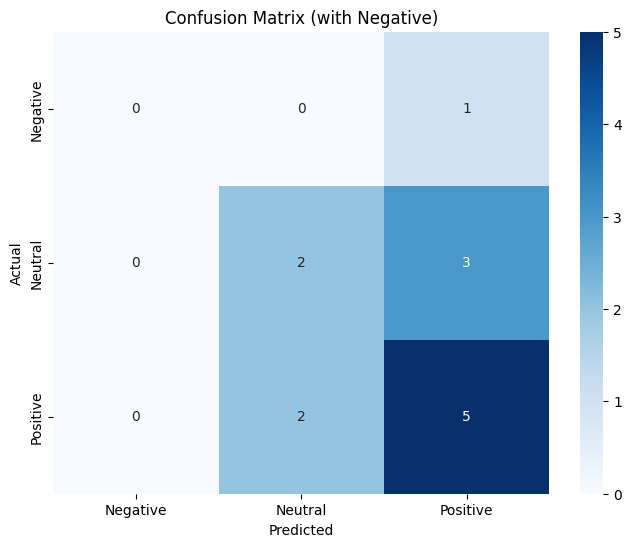

In [5]:
# prompt: create a sythentic dataset that includes negative sentiments and retrain the model

import pandas as pd
import matplotlib.pyplot as plt
# Generate synthetic negative sentiments
synthetic_negative_data = [
    {"text": "This is terrible. I hate it.", "sentiment": "negative"},
    {"text": "Worst experience ever, completely disappointed.", "sentiment": "negative"},
    {"text": "I'm so unhappy with the result.", "sentiment": "negative"},
    {"text": "This was a complete failure.", "sentiment": "negative"},
    {"text": "Feeling really bad about this.", "sentiment": "negative"},
]

# Convert synthetic data to DataFrame
synthetic_df = pd.DataFrame(synthetic_negative_data)

# Append synthetic data to the original dataframe
df_with_negative = pd.concat([df, synthetic_df], ignore_index=True)

# Map all three sentiment labels to numeric values
sentiment_mapping_full = {'negative': 0, 'neutral': 1, 'positive': 2}
df_with_negative['sentiment_numeric'] = df_with_negative['sentiment'].map(sentiment_mapping_full)

print(f"\nDataset with synthetic negative sentiments added.")
print(f"Total messages: {len(df_with_negative)}")
print(f"Sentiment distribution after adding synthetic data:\n{df_with_negative['sentiment'].value_counts()}")

# Now retrain the model using the updated dataframe
print("\n" + "="*50)
print("RETRAINING SENTIMENT MODEL WITH SYNTHETIC NEGATIVE DATA")
print("="*50)

# Preprocess text for the new dataframe
df_with_negative['cleaned_text'] = df_with_negative['text'].apply(preprocess_text)

# Prepare features and labels
X_new = df_with_negative['cleaned_text']
y_new = df_with_negative['sentiment_numeric']

# Split the new data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.3, random_state=42, stratify=y_new
)

print(f"New Training samples: {len(X_train_new)}")
print(f"New Testing samples: {len(X_test_new)}")

# Create a new model pipeline (or reuse the old one)
pipeline_new = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=1000,
        stop_words='english',
        ngram_range=(1, 2),
        min_df=1,
        max_df=0.95
    )),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'  # Handle class imbalance
    ))
])

# Train the new model
print("\nTraining TF-IDF + Logistic Regression model with negative class...")
pipeline_new.fit(X_train_new, y_train_new)

# Make predictions with the new model
y_pred_new = pipeline_new.predict(X_test_new)
y_pred_proba_new = pipeline_new.predict_proba(X_test_new)

# Evaluate the new model
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"\nNew Model Performance:")
print(f"Accuracy: {accuracy_new:.4f}")

# Detailed classification report for three classes
target_names_full = ['Negative', 'Neutral', 'Positive']
print("\nNew Classification Report:")
print(classification_report(y_test_new, y_pred_new, target_names=target_names_full))

# Confusion Matrix for three classes
print("\nNew Confusion Matrix:")
cm_new = confusion_matrix(y_test_new, y_pred_new)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_full, yticklabels=target_names_full)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (with Negative)')
plt.show()

retrained_model = pipeline_new